# Lab 6 Dimension Reduction–WBCD

In [1]:
from sklearn.datasets import load_breast_cancer
# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target
print("Original Shape:", X.shape)

Original Shape: (569, 30)


In [4]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [5]:
def classify_and_evaluate(X, Y, method_name="Original"):
  x_train,x_text,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)
  model=LogisticRegression()
  model.fit(x_train,y_train)
  y_pred= model.predict(x_text)

  acc=accuracy_score(y_test,y_pred)
  prec=precision_score(y_test,y_pred)
  rec=recall_score(y_test,y_pred)
  f1=f1_score(y_test,y_pred)

  print(f"\n=== {method_name} Evaluation ===")
  print(f"Accuracy   : {acc:.4f}")
  print(f"Precision  : {prec:.4f}")
  print(f"Recall     : {rec:.4f}")
  print(f"F1 Score   : {f1:.4f}")

  plt.figure(figsize=(6, 5))
  plt.scatter(range(len(y_test)), y_test, label='Actual',alpha=0.7,c='blue')
  plt.scatter(range(len(y_test)), y_pred, label='Predicted', marker='x',alpha=0.7,c='red')
  plt.title(f'{method_name} Classification')
  plt.ylabel('Class')
  plt.xlabel('Data Points')
  plt.legend()
  plt.show()

  return {"Method":method_name,"Accuracy":acc,"Precision":prec,"Recall":rec,"F1":f1}

## **PCA**

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



=== PCA Evaluation ===
Accuracy   : 0.9708
Precision  : 0.9725
Recall     : 0.9815
F1 Score   : 0.9770


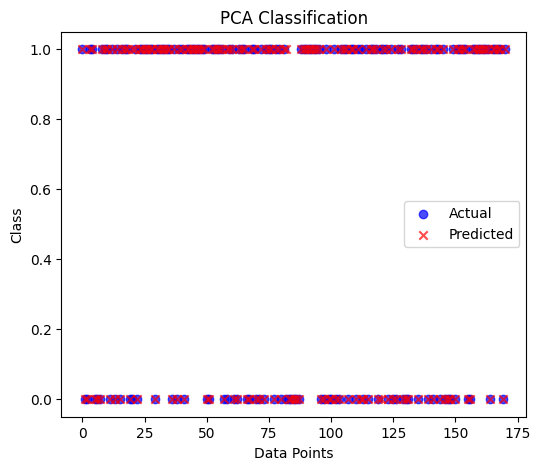

{'Method': 'PCA',
 'Accuracy': 0.9707602339181286,
 'Precision': 0.9724770642201835,
 'Recall': 0.9814814814814815,
 'F1': 0.9769585253456221}

In [6]:
from sklearn.decomposition import PCA
pca=PCA(n_components=10)
X_pca=pca.fit_transform(X)
classify_and_evaluate(X_pca,y,"PCA")


## LDA


=== LDA Evaluation ===
Accuracy   : 0.9883
Precision  : 0.9907
Recall     : 0.9907
F1 Score   : 0.9907


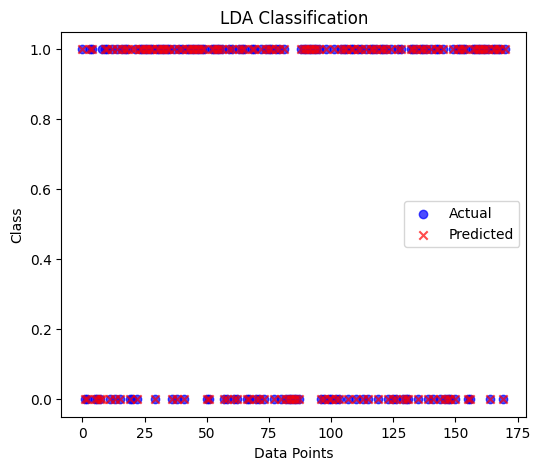

{'Method': 'LDA',
 'Accuracy': 0.9883040935672515,
 'Precision': 0.9907407407407407,
 'Recall': 0.9907407407407407,
 'F1': 0.9907407407407407}

In [7]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda=LDA(n_components=1)
X_lda=lda.fit_transform(X,y)
classify_and_evaluate(X_lda,y,"LDA")

## T-SNE


=== T-SNE Evaluation ===
Accuracy   : 0.9298
Precision  : 0.9286
Recall     : 0.9630
F1 Score   : 0.9455


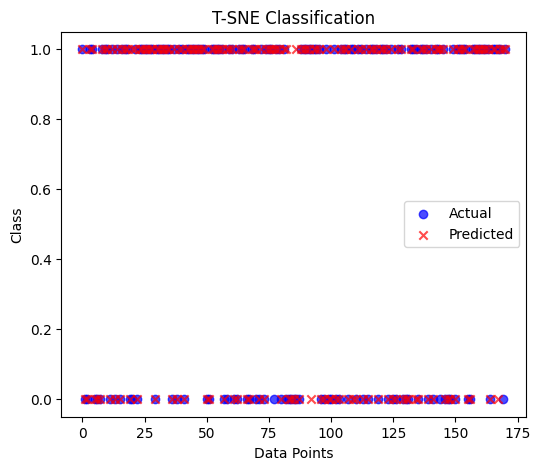

{'Method': 'T-SNE',
 'Accuracy': 0.9298245614035088,
 'Precision': 0.9285714285714286,
 'Recall': 0.9629629629629629,
 'F1': 0.9454545454545454}

In [9]:
from sklearn.manifold import TSNE
tsne=TSNE(n_components=2)
X_tsne=tsne.fit_transform(X)
classify_and_evaluate(X_tsne,y,"T-SNE")